<a id="top"></a>
# SpaceX Falcon9 First Stage Landing Prediction
### (Data Analysis)

SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because SpaceX can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against SpaceX for a rocket launch. In this lab, you will collect and make sure the data is in the correct format from an API. The following is an example of a successful and launch.

## Methodology

Basically I will follow this foundational methodology as the base for this project.



1. Collect data using SpaceX API (HTTP request, JSON) and Save as CSV file.
2. Data Preparation.
    - Data cleaning
    - EDA
    - Feature Engineering
3. Store data in a database (SQlite)
4. Querying data
5. Data Analysis
6. Presentation

<div class="alert alert-info">
    <h4>Table of Content</h4>
    <ol>
        <li>
            <a href="#business-understanding">Business Understanding</a>
            <ol>
                <li><a href="#bu-business-impact">Business Impact</a></li>
                <li><a href="#bu-stackholders">Stackholders</a></li>
                <li><a href="#bu-data-sources">Data Sources</a></li>
                <li><a href="#bu-technology-and-tools">Technology and Tools</a></li>
            </ol>
        </li>
        <li>
            <a href="#data-understanding">Data Understanding</a>
        </li>
    </ol>
</div>

<a id="business-understanding"></a>
## Business Understanding
<a id="bu-business-impact"></a>
### Business Impact
Aerospace manufacturing is a very expensive process. According to SpaceX website, because of their approach of reusing stage 1 reduces the total cost from a significant amount. Therefore, these analysis and predictions will very useful for future projects of aerospace industry.

<a id="bu-stackholders"></a>
### Stackholders
For this project stackholders possibly be
- SpaceX
- NASA
- Aerospace manufacturers around the world

<a id="bu-data-sources"></a>
### Data Sources
SpaceX API: https://api.spacexdata.com/v4/

From this API, I fetch following data.
<ul>
    <li>Booster Versions</li>
    <li>Launch Site</li>
    <li>Payload Data</li>
    <li>Booster Versions</li>
    <li>Core Data</li>
    <li>Launch Data</li>
</ul>

Falcon 9 Wikipedia Page: 
- Old launches from 2010 - 2019 - https://en.wikipedia.org/wiki/List_of_Falcon_9_and_Falcon_Heavy_launches_(2010%E2%80%932019)
- Latest launches 2020 to present date - https://en.wikipedia.org/wiki/List_of_Falcon_9_and_Falcon_Heavy_launches

<a id="bu-technology-and-tools"></a>
### Technology and Tools
I will be using 
- **Python statistical libraries and Mathematical libraries** for data analysis
- SQL language
- SQlite
- Various **Python libraries** to visualize different insights along the way

<a class="float-right text-right" href="#top">[Go to Top]</a>

<a id="data-understanding"></a>
## Data Understanding
First load the dataset
### Connect to database

In [1]:
#!pip install sqlalchemy --user

In [2]:
# import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv, sqlite3, sqlalchemy

%matplotlib inline

In [3]:
con = sqlite3.connect("falcon9.db")
cur = con.cursor()

In [4]:
%load_ext sql

In [5]:
%sql sqlite:///falcon9.db

#### Create a Pandas Dataframe from SQL query

In [6]:
sql_query = "SELECT * FROM `falcon9_tbl`"

In [7]:
df = pd.read_sql(sql=sql_query, con=con)

In [8]:
df.head()

Flight_No   Launch_Site                               Payload  \
0          1  CCSFS SLC 40  Dragon Spacecraft Qualification Unit   
1          2  CCSFS SLC 40             SpaceX COTS Demo Flight 1   
2          3  CCSFS SLC 40             SpaceX COTS Demo Flight 2   
3          4  CCSFS SLC 40                          SpaceX CRS-1   
4          5  CCSFS SLC 40                          SpaceX CRS-2   

   Payload_Mass Orbit Customer Launch_Outcome Version_Booster Booster_Landing  \
0           0.0   LEO   SpaceX        Success        F9 v1.0          Failure   
1           0.0   LEO     NASA        Success        F9 v1.0          Failure   
2         525.0   LEO     NASA        Success        F9 v1.0       No attempt   
3        4700.0   LEO     NASA        Success        F9 v1.0       No attempt   
4        4877.0   LEO     NASA        Success        F9 v1.0       No attempt   

         Date      Time  Longitude   Latitude  
0  2010-06-04  18:45:00 -80.577366  28.561857  
1  2010-12-08  15:43:00 -80.577366  28.561857  
2  2012-05-22  07:44:00 -80.577366  28.561857  
3  2012-10-08  00:35:00 -80.577366  28.561857  
4  2013-03-01  15:10:00 -80.577366  28.561857

Before going any further let's add a *class* colum for representing the classification of Booster Landing.

In [9]:
landing_types = df['Booster_Landing'].value_counts()
landing_types

Success         198
No attempt       23
Failure          11
Controlled        6
Uncontrolled      2
Precluded         1
Name: Booster_Landing, dtype: int64

#### Different Types of Booster Landing Status
- **Success** - Successful Landing
- **Failure** - Failed to Land
- **Controlled** and **Uncontrolled** - A controlled "ocean landing" denotes a controlled atmospheric entry, descent and vertical splashdown on the ocean's surface at near zero velocity, for the sole purpose of gathering test data; such boosters were destroyed at sea.
- **Precluded** - Basically the launch failed

We only consider ***Success*** and ***Failure*** Booster Landing in this project. Therefore let's remove unrelevant records from the dataframe.

In [10]:
unrelevant_landing_types = ['No attempt', 'Controlled', 'Uncontrolled', 'Precluded']

In [11]:
# collect indexes to be removed from the dataset
indexes_to_be_deleted = []
for landing_status in unrelevant_landing_types:
    if landing_status in unrelevant_landing_types:
        indexes_to_be_deleted += list(df[df['Booster_Landing'] == landing_status].index)
        
print(indexes_to_be_deleted)

[2, 3, 4, 6, 7, 10, 11, 15, 17, 30, 33, 37, 48, 50, 51, 54, 55, 56, 65, 73, 78, 184, 185, 8, 9, 14, 45, 47, 49, 5, 12, 18]


In [12]:
df.drop(indexes_to_be_deleted, inplace=True)

In [13]:
df['Booster_Landing'].value_counts()

Success    198
Failure     11
Name: Booster_Landing, dtype: int64

Reset *Flight_No* column

In [14]:
df['Flight_No'] = range(1, df.shape[0] + 1)

Before we go beyond, let's add a *Class* variable as the numerical classification dependent variable in the dataset.

In [15]:
df['Class'] = [1 if landing_status == 'Success' else 0 for landing_status in df['Booster_Landing']]

In [16]:
df

Flight_No   Launch_Site                               Payload  \
0            1  CCSFS SLC 40  Dragon Spacecraft Qualification Unit   
1            2  CCSFS SLC 40             SpaceX COTS Demo Flight 1   
13           3  CCSFS SLC 40                          SpaceX CRS-5   
16           4  CCSFS SLC 40                          SpaceX CRS-6   
19           5  CCSFS SLC 40                           Orbcomm-OG2   
..         ...           ...                                   ...   
236        205   VAFB SLC 4E                   Starlink Group 5-13   
237        206  CCSFS SLC 40                    Starlink Group 6-5   
238        207  CCSFS SLC 40                   Starlink Group 5-15   
239        208   VAFB SLC 4E                   Starlink Group 6-15   
240        209  CCSFS SLC 40                    Starlink Group 6-6   

     Payload_Mass Orbit Customer Launch_Outcome Version_Booster  \
0             0.0   LEO   SpaceX        Success        F9 v1.0    
1             0.0   LEO     NASA        Success        F9 v1.0    
13         2395.0   LEO     NASA        Success    F9 v1.1B1012   
16         1898.0   LEO     NASA        Success    F9 v1.1B1015   
19         2034.0   LEO  Orbcomm        Success      F9 FTB1019   
..            ...   ...      ...            ...             ...   
236           0.0   LEO   SpaceX        Success   F9 B5B1063.12   
237           0.0   LEO   SpaceX        Success           F9 B5   
238           0.0   LEO   SpaceX        Success   F9 B5B1060.16   
239           0.0   LEO   SpaceX        Success           F9 B5   
240           0.0   LEO   SpaceX        Success           F9 B5   

    Booster_Landing        Date      Time   Longitude   Latitude  Class  
0           Failure  2010-06-04  18:45:00  -80.577366  28.561857      0  
1           Failure  2010-12-08  15:43:00  -80.577366  28.561857      0  
13          Failure  2015-01-10  09:47:00  -80.577366  28.561857      0  
16          Failure  2015-04-14  20:10:00  -80.577366  28.561857      0  
19          Success  2015-12-22  01:29:00  -80.577366  28.561857      1  
..              ...         ...       ...         ...        ...    ...  
236         Success  2023-07-07  19:29:00 -120.610829  34.632093      1  
237         Success  2023-07-10  03:58:00  -80.577366  28.561857      1  
238         Success  2023-07-16  03:50:00  -80.577366  28.561857      1  
239         Success  2023-07-20  04:09:00 -120.610829  34.632093      1  
240         Success  2023-07-24  00:50:00  -80.577366  28.561857      1  

[209 rows x 14 columns]

In [17]:
df['Class'].value_counts()

1    198
0     11
Name: Class, dtype: int64

There is a long name in *Orbit* coulmn. Let's use the abbreviation of it. Then it will be easy to display in charts and graphs.

In [228]:
df['Orbit'].value_counts()

LEO                               137
GTO                                32
SSO                                21
Polar                               7
MEO                                 6
Ballistic lunar transfer (BLT)      2
HEO                                 1
Heliocentric                        1
Retrograde                          1
Name: Orbit, dtype: int64

In [229]:
df['Orbit'] = df['Orbit'].replace('Ballistic lunar transfer (BLT)', 'BLT')

## Exploratory Data Analysis

In [18]:
df.dtypes

Flight_No            int64
Launch_Site         object
Payload             object
Payload_Mass       float64
Orbit               object
Customer            object
Launch_Outcome      object
Version_Booster     object
Booster_Landing     object
Date                object
Time                object
Longitude          float64
Latitude           float64
Class                int64
dtype: object

In [19]:
df.isna().sum()

Flight_No          0
Launch_Site        0
Payload            7
Payload_Mass       0
Orbit              1
Customer           0
Launch_Outcome     0
Version_Booster    0
Booster_Landing    0
Date               0
Time               0
Longitude          0
Latitude           0
Class              0
dtype: int64

In [20]:
df['Version_Booster'].unique()

array(['F9 v1.0 ', 'F9 v1.1B1012', 'F9 v1.1B1015', 'F9 FTB1019',
       'F9 v1.1B1017', 'F9 FTB1020', 'F9 FTB1021.1', 'F9 FTB1022',
       'F9 FTB1023.1', 'F9 FTB1024', 'F9 FTB1025.1', 'F9 FTB1026',
       'F9 FTB1029.1', 'F9 FTB1031.1', 'F9 FT♺', 'F9 FTB1032.1',
       'F9 FTB1035.1', 'F9 FTB1029.2', 'F9 FTB1036.1', 'F9 B4B1039.1',
       'F9 FTB1038.1', 'F9 B4B1040.1', 'F9 B4B1041.1', 'F9 FTB1031.2',
       'F9 B4B1042.1', 'F9 FTB1035.2', 'F9 B4', 'F9 B4B1045.1',
       'F9 B5B1046.1', 'F9 B5', 'F9 B5B1048', 'F9 B5B1046.2',
       'F9 B5B1049.1', 'F9 B5B1048.2', 'F9 B5B1047.2', 'F9 B5B1046.3 ',
       'F9 B5B1050', 'F9 B5B1049.2', 'F9 B5B1048.3', 'F9 B5B1051.1',
       'F9 B5B1056.1', 'F9 B5B1049.3', 'F9 B5B1051.2', 'F9 B5B1056.2',
       'F9 B5B1059.1', 'F9 B5B1056.3', 'F9 B5B1058.1', 'F9 B5B1058.2',
       'F9 B5B1049.6', 'F9 B5B1060.2', 'F9 B5B1058.3', 'F9 B5B1051.6',
       'F9 B5B1061.1', 'F9 B5B1049.7', 'F9 B5B1058.4', 'F9 B5B1051.8',
       'F9 B5B1058.5', 'F9 B5B1060.5', 'F9 

### Data Visualization

#### Relationship between Flight Number and Launch Site

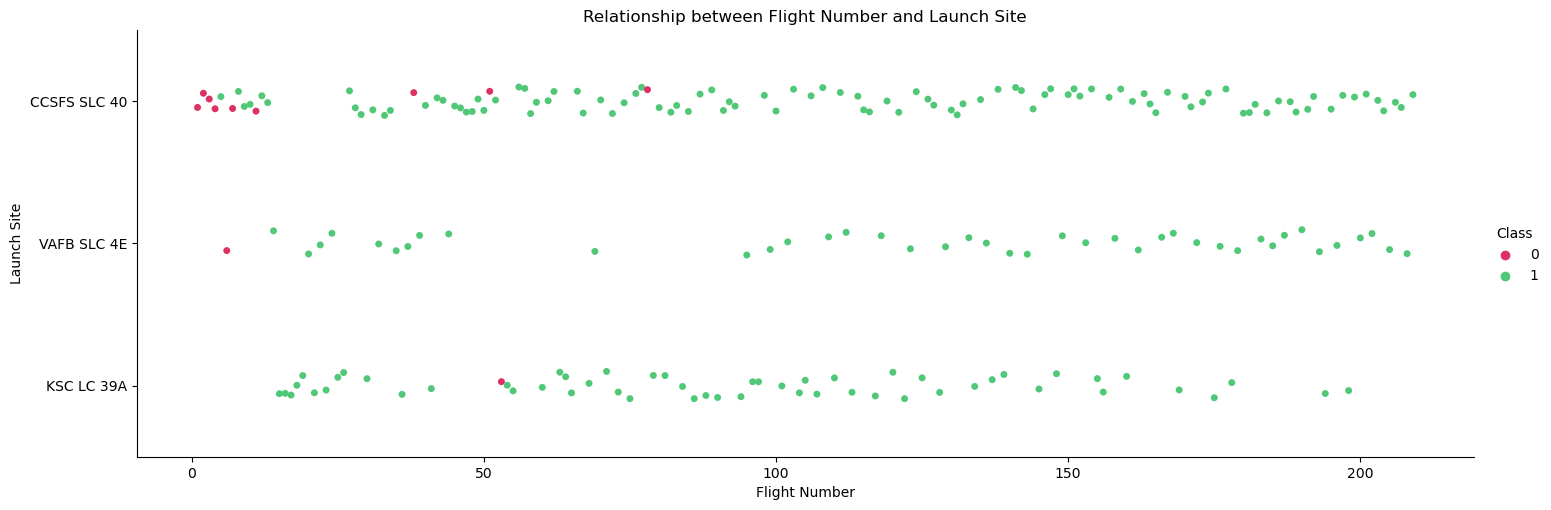

In [250]:
# define my own color palette for binary class
binary_class_palette = sns.set_palette(['#DE3163', '#50C878'])

sns.catplot(data=df, x='Flight_No', y='Launch_Site', hue='Class', aspect=3, palette=binary_class_palette)
plt.title('Relationship between Flight Number and Launch Site')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.show()

<div class="alert alert-info">
    <h4>Observations:</h4>
    <ol>
        <li><b>CCSFS SLC 40</b> has been used quite a lot consistantly and was the first one to be used.</li>
        <li>Booster landings on all three Launch Sites has improved significantly after around 80 Flights.</li>
    </ol>
</div>

#### Relationship between Launch Site and Payload Mass

In [251]:
sns.catplot(data=df, x='Payload_Mass', y='Launch_Site', hue='Class', aspect=3, palette=binary_class_palette)
plt.title('Relationship between Payload Mass and Launch Site')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')
plt.show()

<div class="alert alert-info">
    <h4>Observations:</h4>
    <ol>
        <li>Launch sites <b>CCSFS SLC 40</b> and <b>KSC LC 29A</b> have been used for launches with many different payload mass.</li>
        <li>Payload mass between around 2000kg and 7500kg is the usual values for majority of the launches.</li>
    </ol>
</div>

#### Relationship between Flight Number and Orbit type

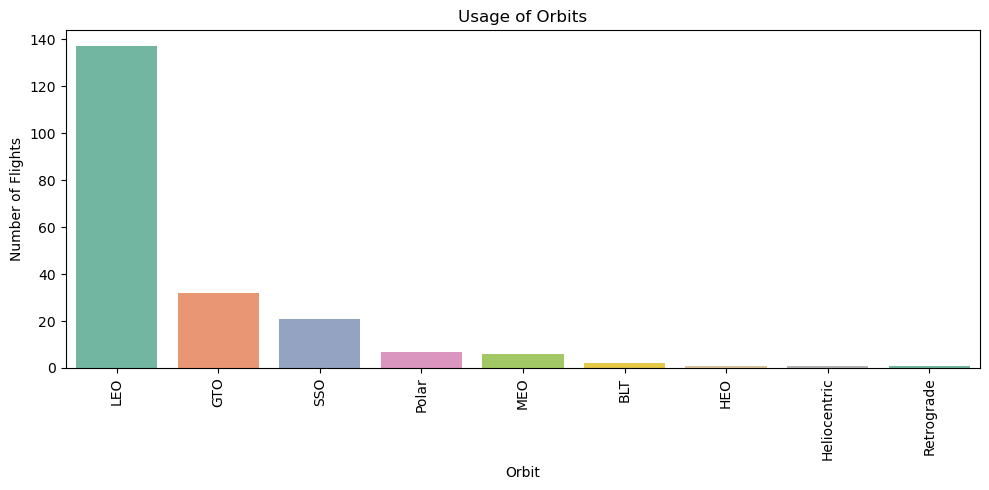

In [252]:
usage_of_orbits = df['Orbit'].value_counts()
usage_of_orbits = usage_of_orbits.to_frame(name='no_of_flights').reset_index(names=['Orbit_type'])

plt.figure(figsize=(10, 5))
sns.stripplot(data=df, x='Orbit', y='Flight_No', hue='Class', palette=binary_class_palette)
plt.title('Relationship between Flight Number and Orbit type')
plt.xlabel('Orbit')
plt.ylabel('Flight Number')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=usage_of_orbits, x='Orbit_type', y='no_of_flights', palette='Set2')
plt.title('Usage of Orbits')
plt.xlabel('Orbit')
plt.ylabel('Number of Flights')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

<div class="alert alert-info">
    <h4>Observations:</h4>
    <ol>
        <li><b>BLT</b>, <b>HEO</b>, <b>Heliocentric</b>, <b>MEO</b>, <b>Polar</b>, <b>Retrograde</b>, and <b>SSO</b> have 100% success rate.</li>
        <li><b>GTO</b>, and <b>LEO</b> have little less but over 95% of success rate.</li>
    </ol>
</div>

#### Relationship between Success Rate and Orbit type

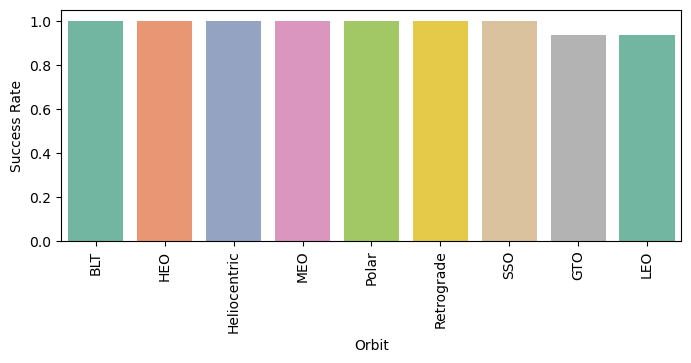

In [235]:
success_rate_orbit_type = df[['Orbit', 'Class']].groupby('Orbit').mean().reset_index().sort_values(by='Class', ascending=False)
#success_rate_orbit_type
plt.figure(figsize=(8, 3))
sns.barplot(data=success_rate_orbit_type, x="Orbit", y="Class", palette='Set2')
plt.xlabel("Orbit")
plt.ylabel("Success Rate")
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-info">
    <h4>Observations:</h4>
    <ol>
        <li><b>BLT</b>, <b>HEO</b>, <b>Heliocentric</b>, <b>MEO</b>, <b>Polar</b>, <b>Retrograde</b>, and <b>SSO</b> have 100% success rate. (High Earth Orbits, rarely used Orbits)</li>
        <li><b>GTO</b>, and <b>LEO</b> have little less but over 95% of success rate. (Low Earth Orbits, Frequently used Orbits mainly for cargo transportation.)</li>
    </ol>
</div>

#### Relationship between Payload Mass and Orbit type
This graph shows how different weights of Payloads taken to different Orbits impacted on success the rate.

In [253]:
plt.figure(figsize=(15, 5))
sns.stripplot(data=df, x='Payload_Mass', y='Orbit', hue='Class', palette=binary_class_palette)
plt.title('Relationship between Payload Mass and Orbit type')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit')
plt.show()